In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import os

%matplotlib inline

# CONSTANTS

In [2]:
COVID_DATA_PATH = "../data/COVID_ESP/casos_hosp_uci_def_sexo_edad_provres.csv"

# ESCALAS

In [3]:
# load data - only from 2020-03-02
covid_data = pd.read_csv(COVID_DATA_PATH)
covid_data = covid_data[covid_data["fecha"] >= "2020-03-02"].sort_values(["provincia_iso", "fecha"])

covid_data.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
96990,A,H,0-9,2020-03-02,0,0,0,0
96991,A,H,10-19,2020-03-02,0,0,0,0
96992,A,H,20-29,2020-03-02,0,0,0,0
96993,A,H,30-39,2020-03-02,0,0,0,0
96994,A,H,40-49,2020-03-02,0,0,0,0


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202040 entries, 96990 to 1298399
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   provincia_iso  1179360 non-null  object
 1   sexo           1202040 non-null  object
 2   grupo_edad     1202040 non-null  object
 3   fecha          1202040 non-null  object
 4   num_casos      1202040 non-null  int64 
 5   num_hosp       1202040 non-null  int64 
 6   num_uci        1202040 non-null  int64 
 7   num_def        1202040 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 82.5+ MB


Preparamos los datos que queremos visualizar.

Hacemos un slice al dataframe para obtener el número de casos para Andalucía ("A") ordenados por fecha.

In [5]:
num_cases_a = covid_data.loc[covid_data["provincia_iso"] == "A", ["fecha", "num_casos"]].sort_values("fecha").groupby("fecha").sum()

>Vamos a trabajar con listas de python en este caso.

In [6]:
dates = num_cases_a.index.values.tolist()[:150]
dates_labels = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates][:150]
num_cases_a_values = num_cases_a["num_casos"].values.tolist()[:150]

Creamos el gráfico con matplotlib.

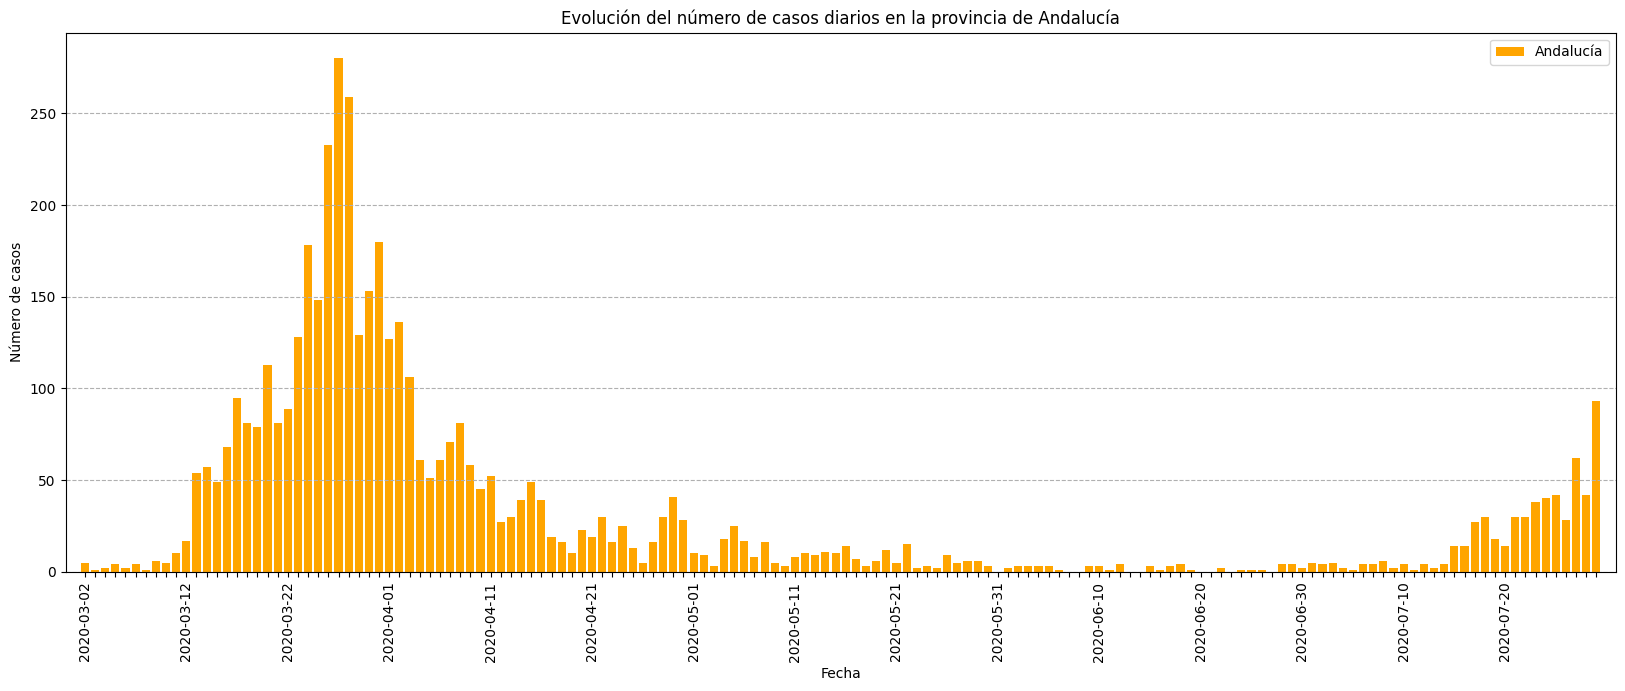

In [7]:
# figure and axes
fig, ax = plt.subplots(figsize=(20, 7))
# plot
p1 = ax.bar(dates, num_cases_a_values, color="orange", label="A")

# x ticks
ax.set_xticks(dates, minor=True)
# show labels for only some ticks
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))      
ax.set_xticklabels(dates_labels, rotation=90)
ax.set_xlim(min(dates), max(dates), auto=True)
ax.margins(x=0.01)
# labels
ax.set_ylabel("Número de casos")
ax.set_xlabel("Fecha")
# legend
ax.legend(["Andalucía"])
# grid
plt.grid(axis="y", which="both", linestyle='--', linewidth=0.8)
# title
plt.title("Evolución del número de casos diarios en la provincia de Andalucía")

plt.show();

Vamos a añadir los casos en madrid y cataluña.

In [8]:
num_cases_m = covid_data.loc[covid_data["provincia_iso"] == "M", ["fecha", "num_casos"]].sort_values("fecha").groupby("fecha").sum()
num_cases_m_values = num_cases_m["num_casos"].values.tolist()[:50]

In [9]:
num_cases_b = covid_data.loc[covid_data["provincia_iso"] == "B", ["fecha", "num_casos"]].sort_values("fecha").groupby("fecha").sum()
num_cases_b_values = num_cases_b["num_casos"].values.tolist()[:50]

In [10]:
dates_2 = num_cases_b.index.values.tolist()[:50]
dates_labels_2 = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates_2]

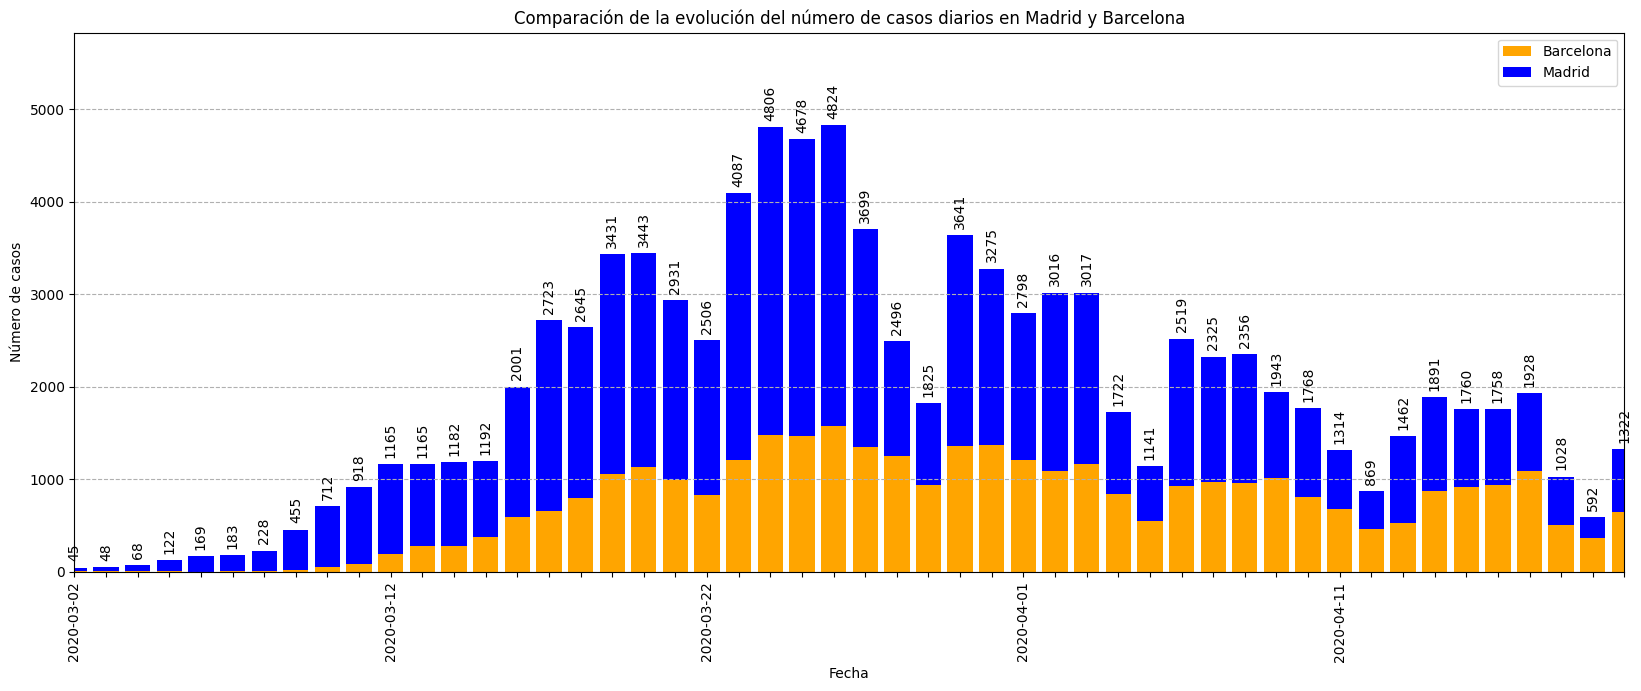

In [11]:
# figure and axes
fig, ax = plt.subplots(figsize=(20, 7))
# plot
ax.bar(dates_2, num_cases_b_values, color="orange", label="B")
ax.bar(dates_2, num_cases_m_values, color="blue", label="M", bottom=num_cases_b_values)

# x ticks
ax.set_xticks(dates_2, minor=True)
# show labels for only some ticks
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))      
ax.set_xticklabels(dates_labels_2, rotation=90)
ax.margins(x=0.01)
# labels
ax.set_ylabel("Número de casos")
ax.set_xlabel("Fecha")

# annotate
total_values = [b_value + m_value for b_value, m_value in zip(num_cases_b_values, num_cases_m_values)]
for x, y in zip(dates_2, total_values):
    ax.annotate(y, (x, y+100), ha='center', rotation=90)
# limitss   
ax.set_xlim(min(dates_2), max(dates_2), auto=True)
ax.set_ylim(0, max(total_values) + 1000, auto=True)

# legend
ax.legend(["Barcelona", "Madrid"])
# grid
plt.grid(axis="y", which="both", linestyle='--', linewidth=0.8)
# title
plt.title("Comparación de la evolución del número de casos diarios en Madrid y Barcelona")

plt.show();

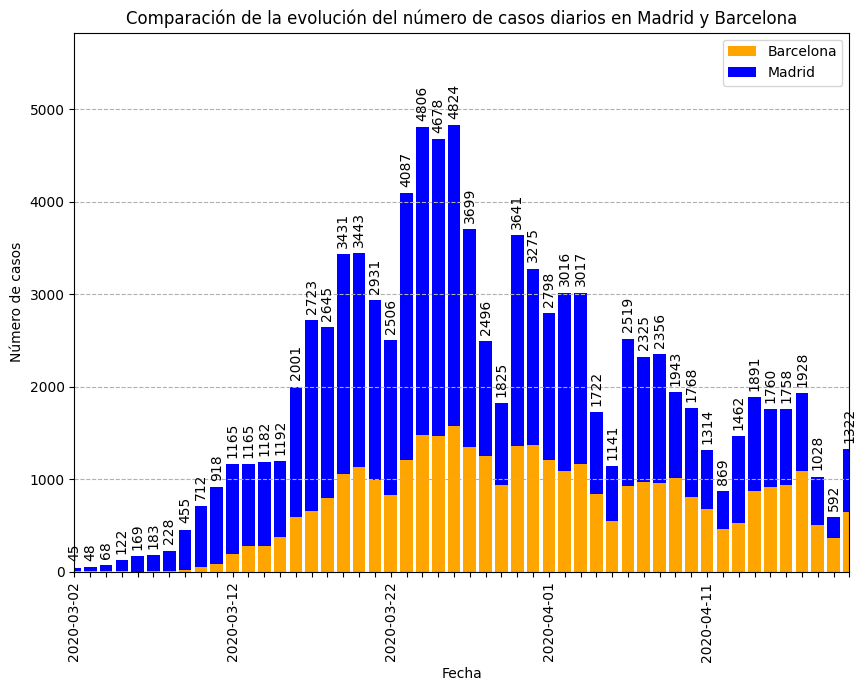

In [12]:
# figure and axes
fig, ax = plt.subplots(figsize=(10, 7))
# plot
ax.bar(dates_2, num_cases_b_values, color="orange", label="B")
ax.bar(dates_2, num_cases_m_values, color="blue", label="M", bottom=num_cases_b_values)

# x ticks
ax.set_xticks(dates_2, minor=True)
# show labels for only some ticks
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))      
ax.set_xticklabels(dates_labels_2, rotation=90)
ax.margins(x=0.01)
# labels
ax.set_ylabel("Número de casos")
ax.set_xlabel("Fecha")

# annotate
total_values = [b_value + m_value for b_value, m_value in zip(num_cases_b_values, num_cases_m_values)]
for x, y in zip(dates_2, total_values):
    ax.annotate(y, (x, y+100), ha='center', rotation=90)
# limitss   
ax.set_xlim(min(dates_2), max(dates_2), auto=True)
ax.set_ylim(0, max(total_values) + 1000, auto=True)

# legend
ax.legend(["Barcelona", "Madrid"])
# grid
plt.grid(axis="y", which="both", linestyle='--', linewidth=0.8)
# title
plt.title("Comparación de la evolución del número de casos diarios en Madrid y Barcelona")
plt.show();

Vamos a calcular el número de casos diarios por 100.000 hab. Asumimos que la población de Andalucía es 8.427.000 millones de hab.

In [13]:
a_population = 8_427_000
dates_ratio = num_cases_a.index.values.tolist()[50:150]
dates_ratio_labels = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates_ratio]
ratio_a = num_cases_a["num_casos"].map(lambda x: x / a_population * 100_000).values.tolist()[50:150]

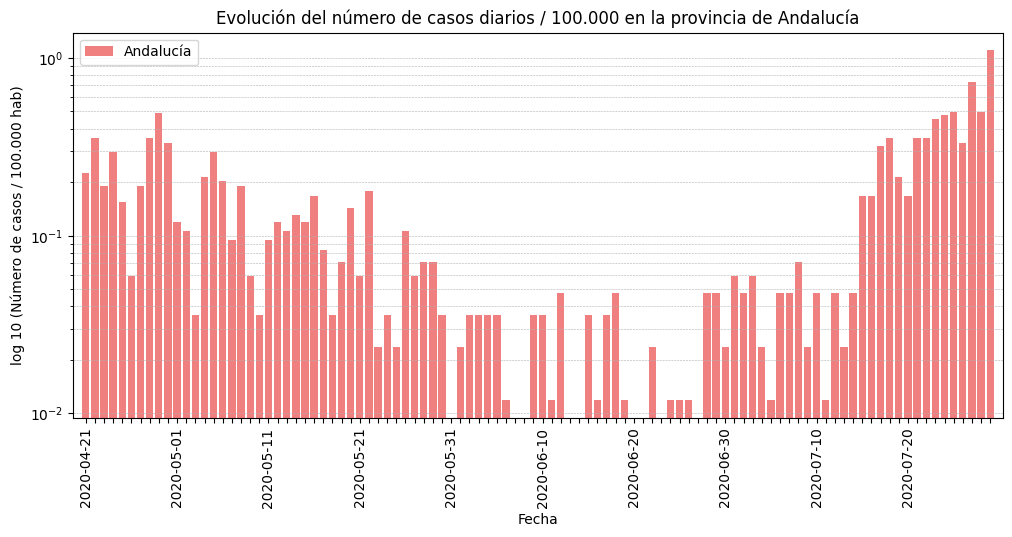

In [14]:
# figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
# plot
p1 = ax.bar(dates_ratio, ratio_a, color="lightcoral", label="A")

# x ticks
ax.set_xticks(dates_ratio, minor=True)
# show labels for only some ticks
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))      
ax.set_xticklabels(dates_ratio_labels, rotation=90)
ax.set_xlim(min(dates_ratio), max(dates_ratio), auto=True)
ax.margins(x=0.01)
# log scale
ax.set_yscale('log')
# labels
ax.set_ylabel("log 10 (Número de casos / 100.000 hab)")
ax.set_xlabel("Fecha")
# legend
ax.legend(["Andalucía"])
# grid
plt.grid(axis="y", which="both", linestyle='--', linewidth=0.4)
# title
plt.title("Evolución del número de casos diarios / 100.000 en la provincia de Andalucía")

plt.show();

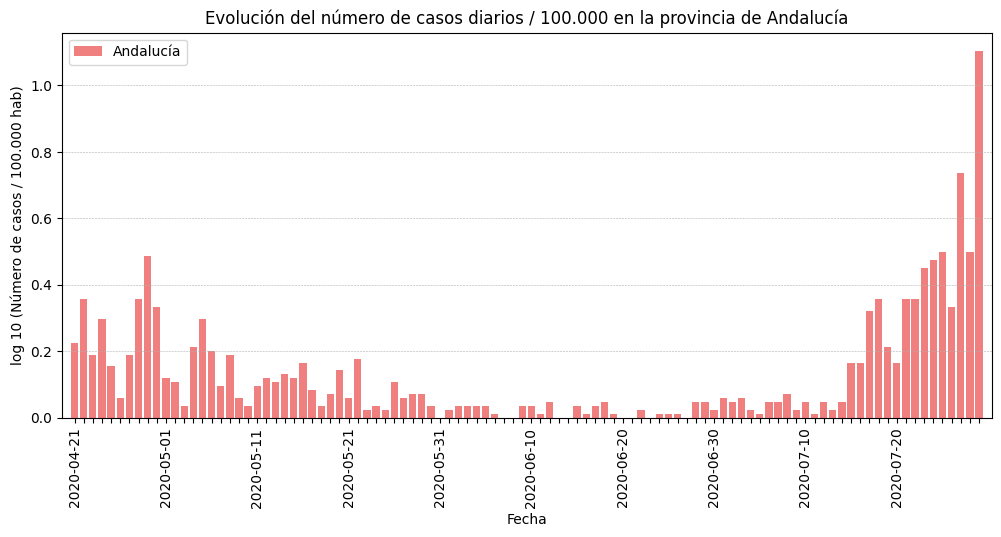

In [15]:
# figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
# plot
p1 = ax.bar(dates_ratio, ratio_a, color="lightcoral", label="A")

# x ticks
ax.set_xticks(dates_ratio, minor=True)
# show labels for only some ticks
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))      
ax.set_xticklabels(dates_ratio_labels, rotation=90)
ax.set_xlim(min(dates_ratio), max(dates_ratio), auto=True)
ax.margins(x=0.01)
# log scale
ax.set_yscale('linear')
# labels
ax.set_ylabel("log 10 (Número de casos / 100.000 hab)")
ax.set_xlabel("Fecha")
# legend
ax.legend(["Andalucía"])
# grid
plt.grid(axis="y", which="both", linestyle='--', linewidth=0.4)
# title
plt.title("Evolución del número de casos diarios / 100.000 en la provincia de Andalucía")

plt.show();

# TIPOS DE VISUALIZACIONES
## CANTIDADES

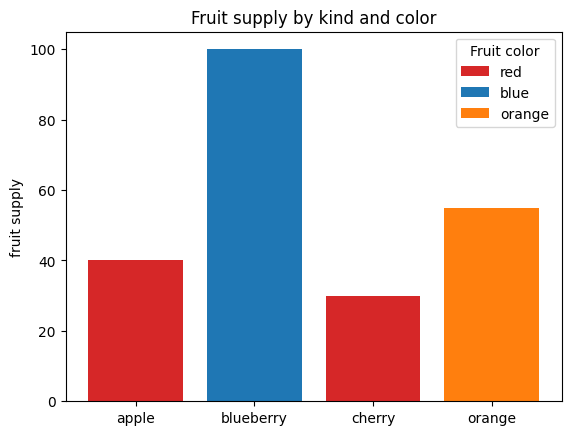

In [16]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Con etiquetas demasiado largas.

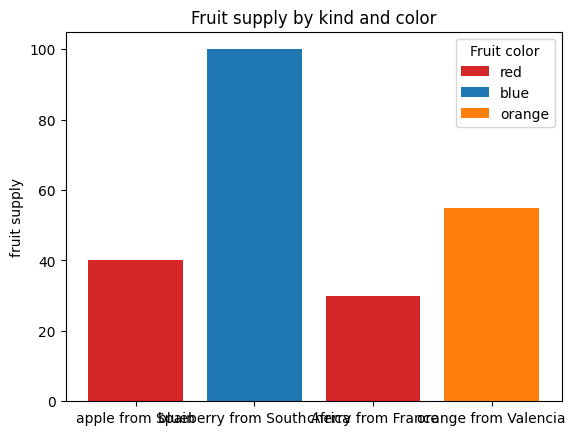

In [17]:
fig, ax = plt.subplots()

fruits = ['apple from Spain', 'blueberry from South Africa', 'cherry from France', 'orange from Valencia']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Rotar etiquetas 45º.

/var/folders/bq/mvx60qb56yq833cn5fsbnh_r0000gn/T/ipykernel_83056/3224638137.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fruits, rotation=45, horizontalalignment="right")


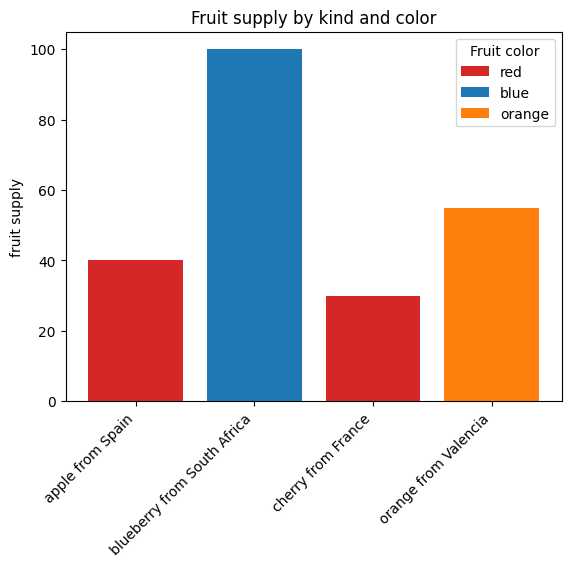

In [18]:
fig, ax = plt.subplots()

fruits = ['apple from Spain', 'blueberry from South Africa', 'cherry from France', 'orange from Valencia']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_xticklabels(fruits, rotation=45, horizontalalignment="right")
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Gráfico de barras horizontal mejor en este caso.

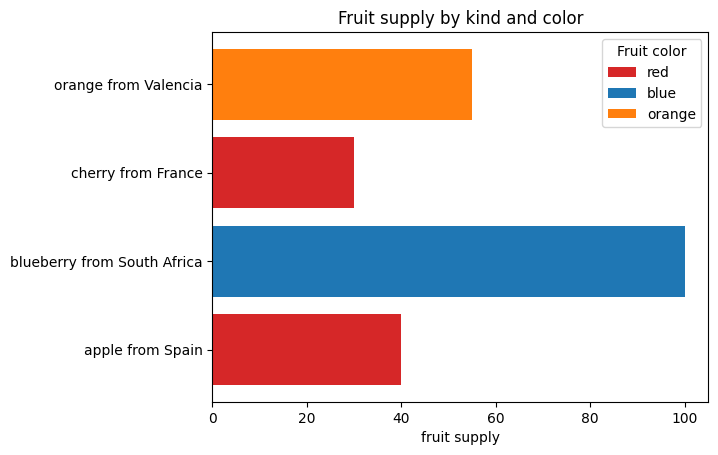

In [19]:
fig, ax = plt.subplots()

fruits = ['apple from Spain', 'blueberry from South Africa', 'cherry from France', 'orange from Valencia']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_xlabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Ordernar las categorías por cantidades.

In [20]:
fruits = ['apple from Spain', 'blueberry from South Africa', 'cherry from France', 'orange from Valencia']
counts = [40, 100, 30, 55]

df_fruits = pd.DataFrame([fruits, counts]).T.rename(columns={0: "fruits", 1: "count"}) \
    .sort_values("count", ascending=True)
df_fruits

,fruits,count
2,cherry from France,30
0,apple from Spain,40
3,orange from Valencia,55
1,blueberry from South Africa,100


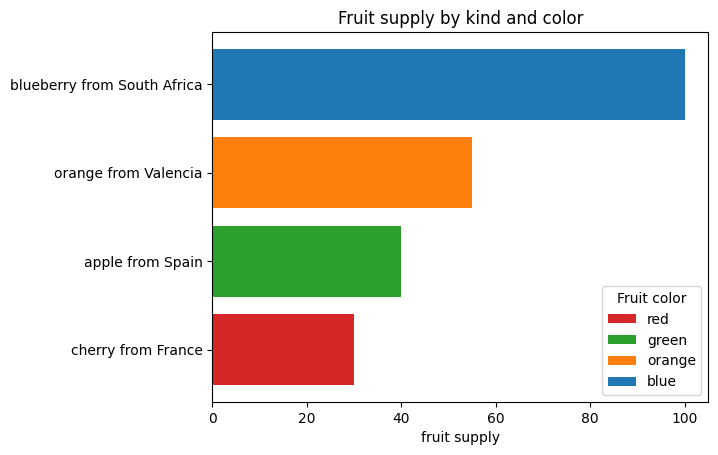

In [21]:
fig, ax = plt.subplots()

fruits = df_fruits["fruits"].values.tolist()
counts = df_fruits["count"].values.tolist()
bar_labels = ['red', 'green', 'orange', 'blue']
bar_colors = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue']

ax.barh(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_xlabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Gráfico de barras agrupadas con seaborn.

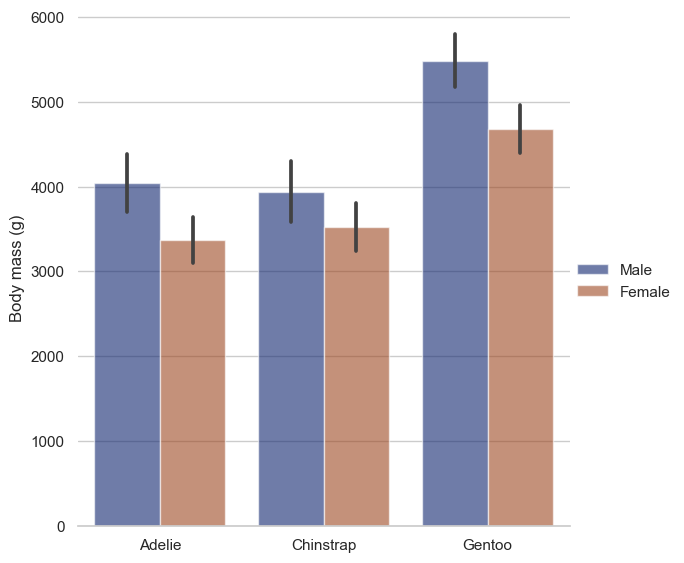

In [22]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

Puntos para visualizar cantidades.

In [25]:
crashes = sns.load_dataset("car_crashes")

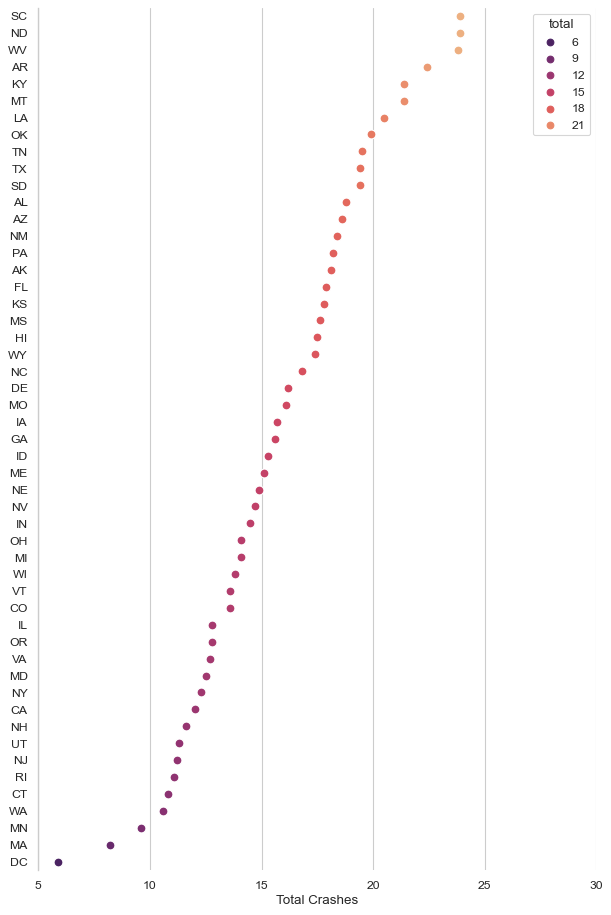

In [26]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(9,14), dpi=80)

g = sns.stripplot(
    crashes.sort_values("total", ascending=False),
    x="total",
    y="abbrev",
    hue="total",
    size=8,
    jitter=False,
    palette="flare_r",
    linewidth=1,
    edgecolor="w",
    ax=ax
)

g.set(xlim=(5, 30), xlabel="Total Crashes", ylabel="")
sns.despine(left=False, bottom=True)

## Distribuciones

### Histograma

In [27]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [28]:
health_data = sns.load_dataset("healthexp")
health_data.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


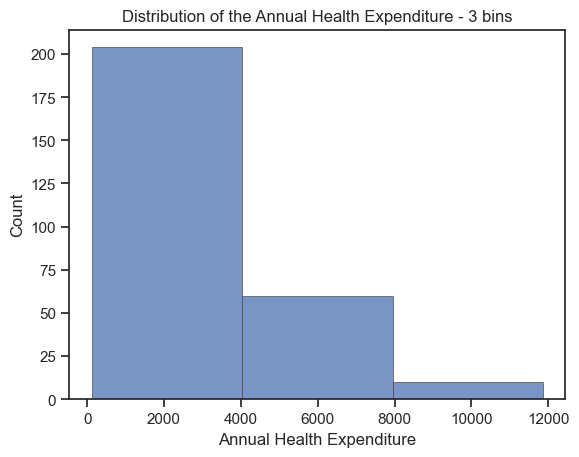

In [29]:
sns.set_theme(style="ticks")
BINS = 3

sns.histplot(
    health_data,
    x="Spending_USD",
    bins=BINS,
    edgecolor=".3",
    linewidth=.5
)

plt.xlabel("Annual Health Expenditure")
plt.title(f"Distribution of the Annual Health Expenditure - {BINS} bins")
plt.show()

### Gráfico de densidad

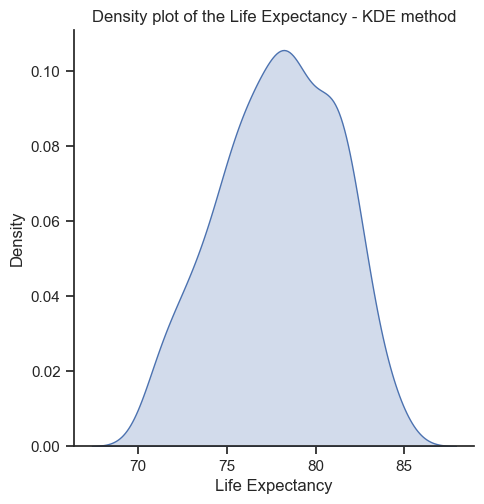

In [30]:
sns.set_theme(style="ticks")

sns.displot(
    health_data,
    x="Life_Expectancy",
    kind="kde",
    fill=True
)

plt.xlabel("Life Expectancy")
plt.title(f"Density plot of the Life Expectancy - KDE method")
plt.show()

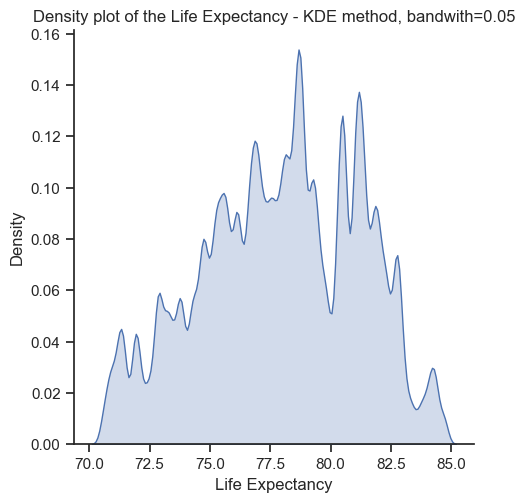

In [31]:
sns.displot(
    health_data,
    x="Life_Expectancy",
    kind="kde",
    fill=True,
    bw_method=0.05
)

plt.xlabel("Life Expectancy")
plt.title(f"Density plot of the Life Expectancy - KDE method, bandwith=0.05")
plt.show()

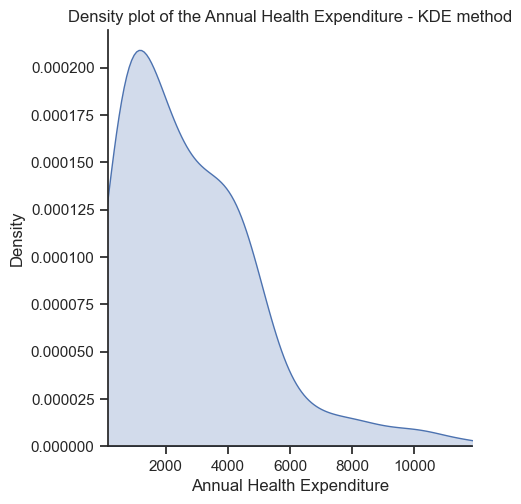

In [32]:
sns.displot(
    health_data,
    x="Spending_USD",
    kind="kde",
    fill=True
)

plt.xlim(health_data["Spending_USD"].min(), health_data["Spending_USD"].max())
plt.xlabel("Annual Health Expenditure")
plt.title(f"Density plot of the Annual Health Expenditure - KDE method")
plt.show()

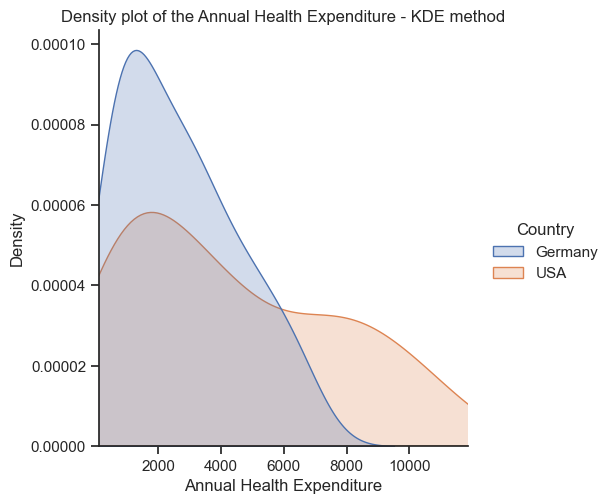

In [33]:
germ_usa_data = health_data.loc[health_data["Country"].isin(["Germany", "USA"])]

sns.displot(
    germ_usa_data,
    x="Spending_USD",
    hue="Country",
    kind="kde",
    fill=True
)

plt.xlim(health_data["Spending_USD"].min(), health_data["Spending_USD"].max())
plt.xlabel("Annual Health Expenditure")
plt.title(f"Density plot of the Annual Health Expenditure - KDE method")
plt.show()

## RELACIONES ENTRE VARIABLES

### SCATTER PLOT

In [74]:
covid_data.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
96990,A,H,0-9,2020-03-02,0,0,0,0
96991,A,H,10-19,2020-03-02,0,0,0,0
96992,A,H,20-29,2020-03-02,0,0,0,0
96993,A,H,30-39,2020-03-02,0,0,0,0
96994,A,H,40-49,2020-03-02,0,0,0,0


In [87]:
a_data = covid_data.loc[
    (covid_data["provincia_iso"] == "M") &
    (covid_data["grupo_edad"] == "60-69")
]

Text(0.5, 1.0, 'Madrid - Grupo de edad de 60-69 años')

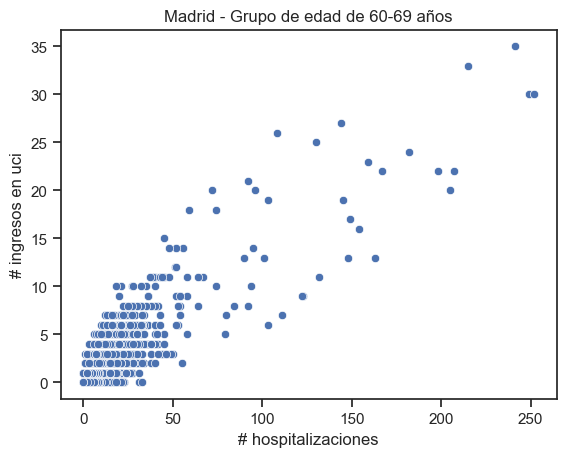

In [98]:
sns.scatterplot(
    data=a_data,
    x="num_hosp",
    y="num_uci"
)

plt.xlabel("# hospitalizaciones")
plt.ylabel("# ingresos en uci")
plt.title("Madrid - Grupo de edad de 60-69 años")

Text(0.5, 1.0, 'Madrid - Grupo de edad de 60-69 años')

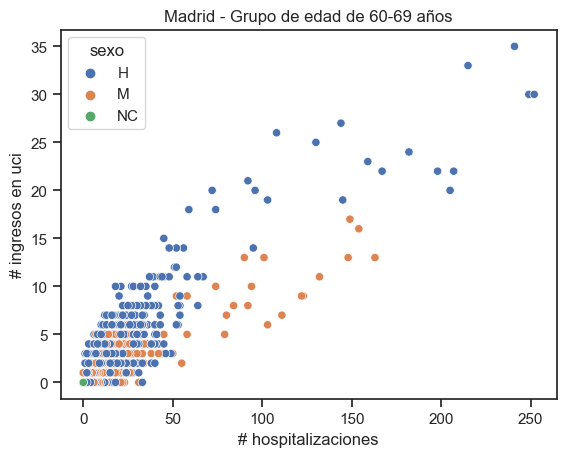

In [99]:
sns.scatterplot(
    data=a_data,
    x="num_hosp",
    y="num_uci",
    hue="sexo"
)

plt.xlabel("# hospitalizaciones")
plt.ylabel("# ingresos en uci")
plt.title("Madrid - Grupo de edad de 60-69 años")

## GRÁFICOS DE LÍNEA

In [101]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [111]:
flights.year.max()

1960

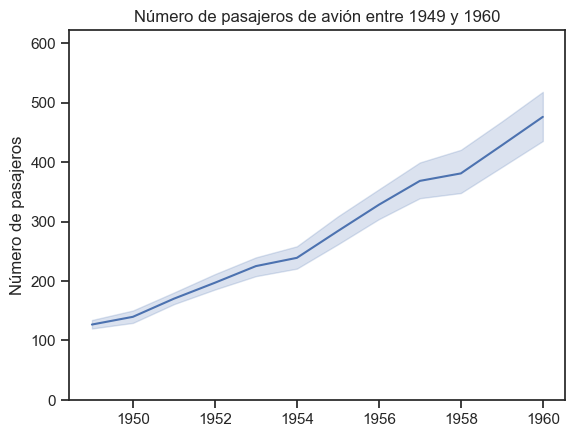

In [115]:
sns.set_theme(style="ticks")

sns.lineplot(
    data=flights,
    x="year",
    y="passengers"
)

plt.ylim(0, flights["passengers"].max())
plt.xlabel("")
plt.ylabel("Número de pasajeros")
plt.title("Número de pasajeros de avión entre 1949 y 1960")
plt.show()

ValueError: The name year occurs multiple times, use a level number

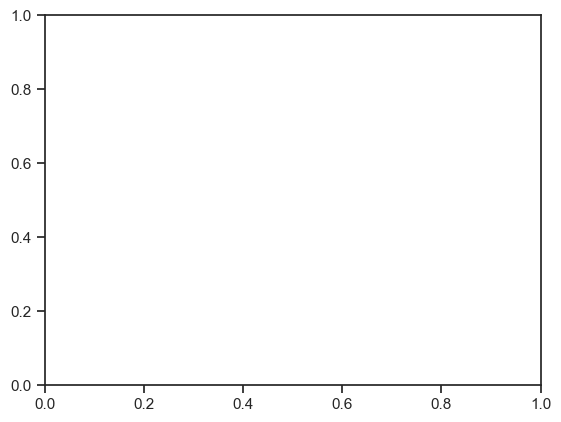

In [123]:
# areaplot

_, ax = plt.subplots()

# df is in long format, pandas requires wide format.
flights_wide = flights.pivot(index="year", columns= "year", values="passengers")

sns.lineplot(
    data=flights,
    x="year",
    y="passengers",
    ax=ax
)

ax.set_prop_cycle(None)
flights_wide.plot.area(stacked=False, alpha=0.2, ax=ax)
ax.set_xlabel("Número de pasajeros")
ax.set_ylabel("")
plt.show()

# PRINCIPIOS DE DISEÑO DE FIGURAS

## PRINCIPIO DE PROPORCIONALIDAD ENTRE DATO Y TINTA

Modificamos el eje y del ejemplo de los pinguinos.

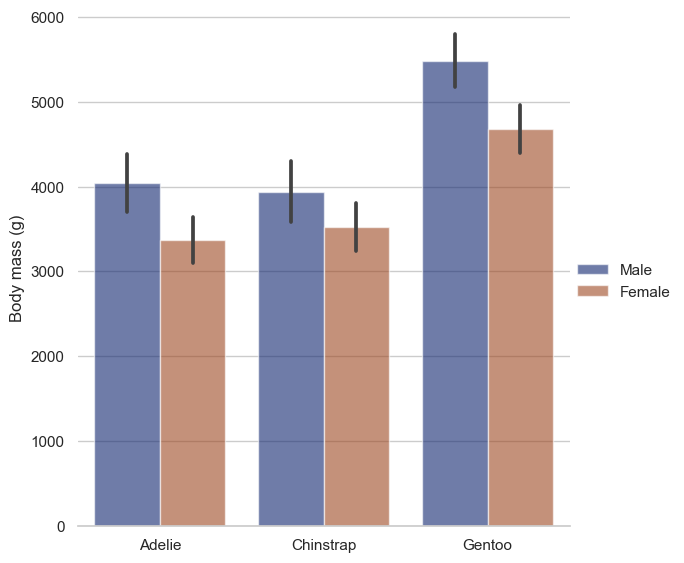

In [34]:
# correcto

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

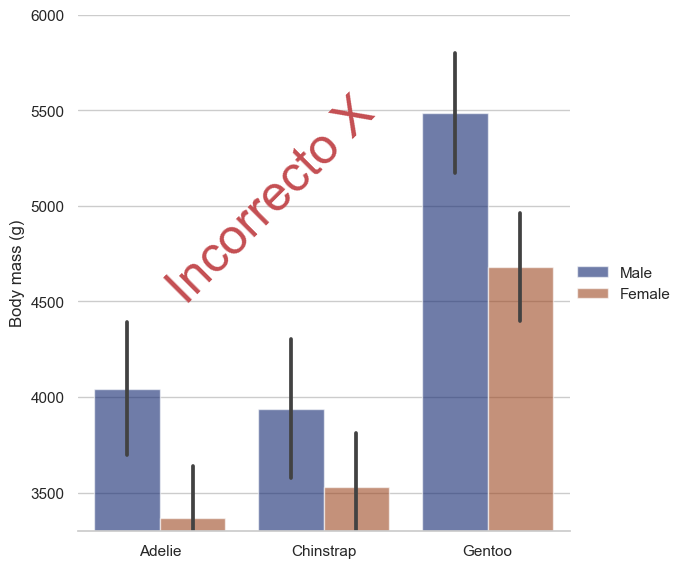

In [59]:
###### incorrecto

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
plt.ylim(3300, 6000)
plt.annotate("Incorrecto X", xy=(0, 4500), color="r", fontsize=36, rotation=45)
plt.show()

# CONTANDO UNA HISTORIA

## DE SIMPLE A COMPLEJO

In [61]:
df = sns.load_dataset("penguins")

In [63]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


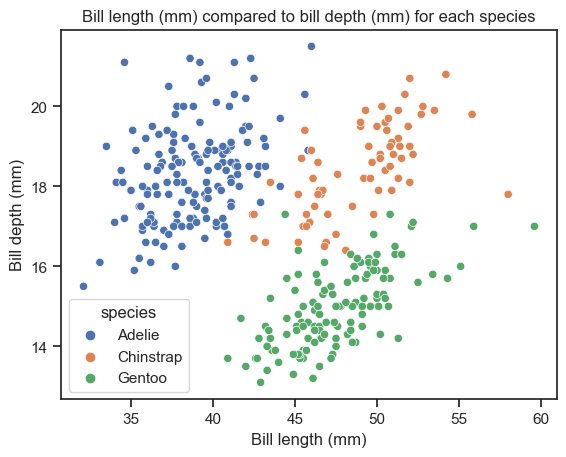

In [67]:
# simple - intro
sns.set_theme(style="ticks")

sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Bill length (mm) compared to bill depth (mm) for each species")
plt.show()

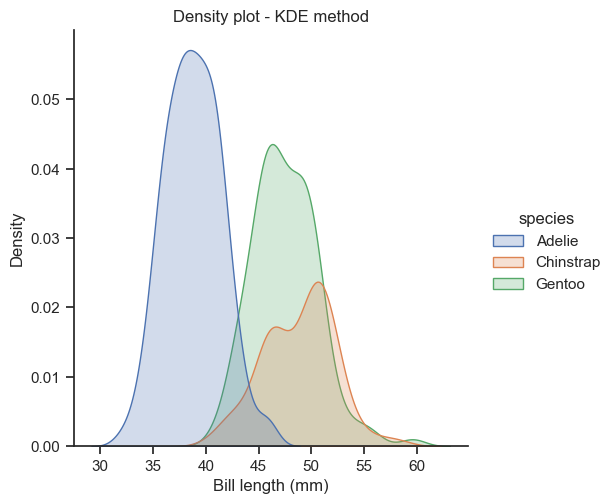

In [72]:
sns.displot(
    df,
    x="bill_length_mm",
    hue="species",
    kind="kde",
    fill=True
)
plt.xlabel("Bill length (mm)")
plt.title("Density plot - KDE method")
plt.show()

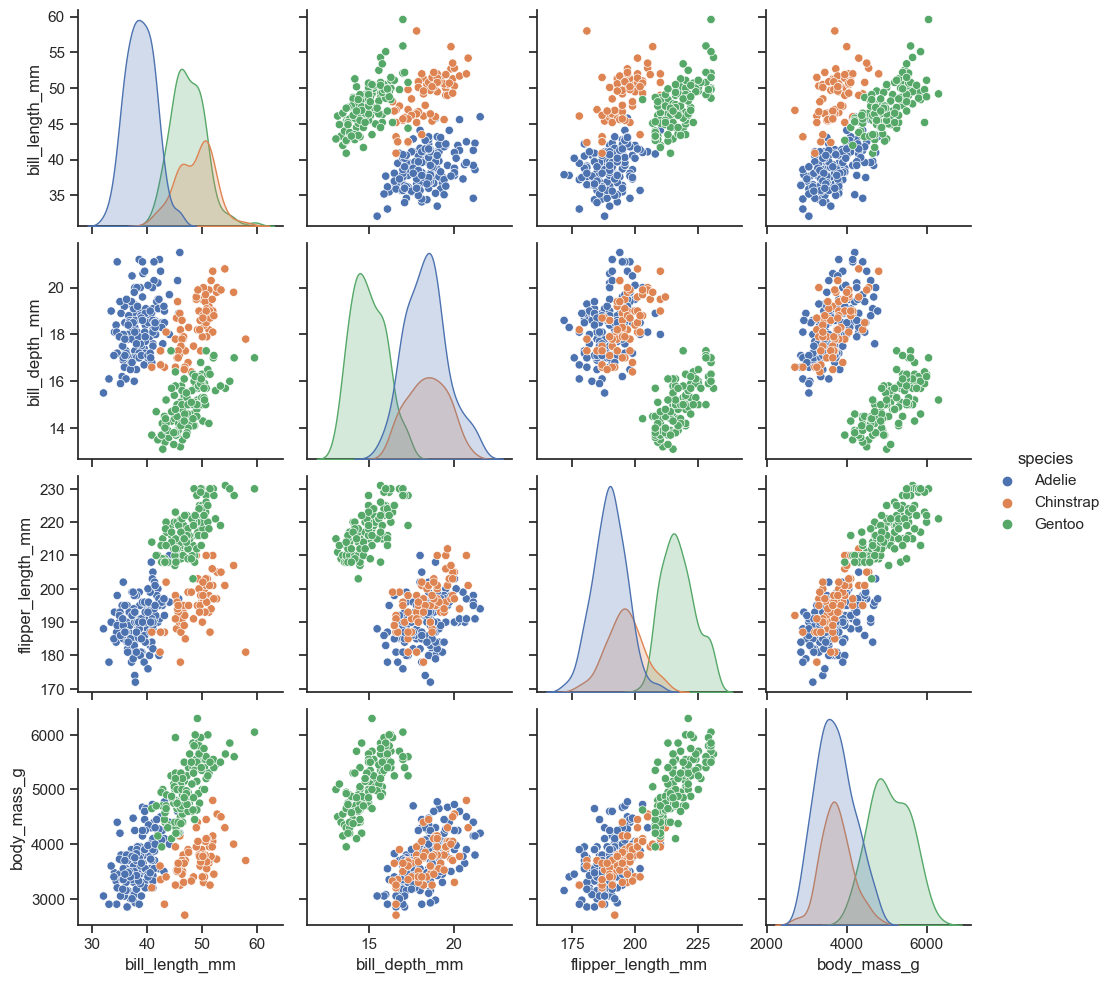

In [73]:
sns.pairplot(df, hue="species")